Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


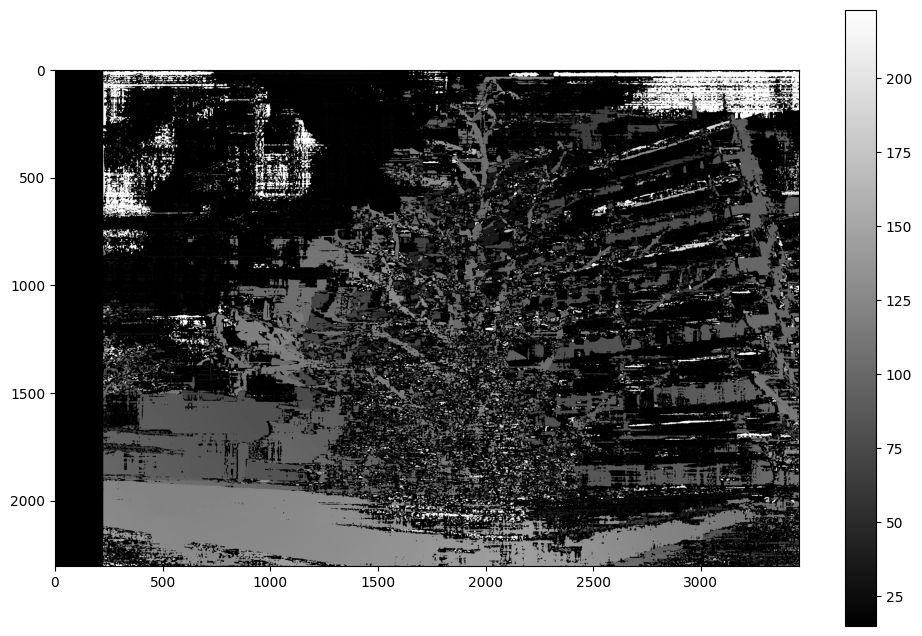

In [ ]:
import cv2 as cv
from google.colab import drive
from google.colab.patches import cv2_imshow
import numpy as np
from matplotlib import pyplot as plt
drive.mount('/content/drive')


# Lade die beiden Bilder
imgL = cv.imread('/content/drive/My Drive/Baum_L.JPG', 0)
imgR = cv.imread('/content/drive/My Drive/Baum_R.JPG', 0)

window_size = 7
min_disp = 16
nDispFactor = 14
num_disp = 16*nDispFactor-min_disp

stereo = cv.StereoSGBM_create(minDisparity = min_disp,
                              numDisparities = num_disp,
                              blockSize = window_size,
                              P1 = 8 * 3 * window_size**2,
                              P2 = 32 * 3 * window_size**2,
                              disp12MaxDiff = 1,
                              uniquenessRatio = 15,
                              speckleWindowSize = 0,
                              speckleRange = 2,
                              preFilterCap = 63,
                              mode = cv.STEREO_SGBM_MODE_SGBM_3WAY)

#compute
disparity = stereo.compute(imgL,imgR).astype(np.float32) / 16.0

#Display
plt.figure(figsize=(12, 8))
plt.imshow(disparity, 'gray')
plt.colorbar()
plt.show()

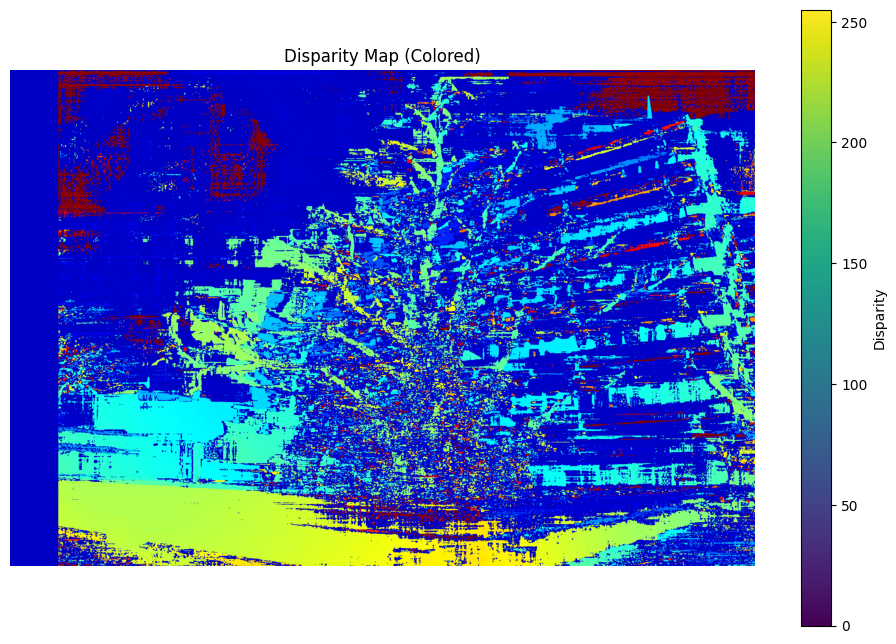

In [ ]:
def show_disparity_with_color(disparity_map):
    # Umwandeln der Disparitätskarte in Farbe mit Jet-Colormap
    disparity_color = cv.applyColorMap((disparity_map * 255 / np.max(disparity_map)).astype(np.uint8), cv.COLORMAP_JET)

    # Anzeigen der Disparitätskarte mit Farbe
    plt.figure(figsize=(12, 8))
    plt.imshow(cv.cvtColor(disparity_color, cv.COLOR_BGR2RGB))
    plt.colorbar(label='Disparity')
    plt.title('Disparity Map (Colored)')
    plt.axis('off')
    plt.show()

# Berechnen der Disparitätskarte
disparity_map = stereo.compute(imgL, imgR).astype(np.float32) / 16.0

# Anzeigen der Disparitätskarte mit Farbe
show_disparity_with_color(disparity_map)